<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 4.2 - Spectral Graph Bipartitioning

### Thomas Derr

In [ ]:
import networkx as nx
import numpy as np
import matplotlib as plt

A graph partition aims to find the minimum cut (number of edges between two disjoint sets of nodes).

For a weighted graph $G = (V,E)$, given a bipartition of $V$ into disjoint $V_1, V_2$ where $V_1 \cup V_2 = V$, the cut between the two sets of nodes is


$\text{cut}(V_1, V_2) = \sum \limits _{i \in V_1, j \in V_2}M_{ij}$


For $k$ disjoint node subsets, the cut generalizes to

$\text{cut}(V_1, V_2, ..., V_k) = \sum \limits _{i < j}\text{cut}(V_i, V_j)$


The classical graph bipartitioning problem is to find nearly equally sized subsets $V_1 \cup V_2 = V$ and $V_1 \cap V_2 = \emptyset$ such that $\text{cut}(V_1)^*, V_2^*) = \min_{V_1,V_2} \text{cut}(V_1), V_2)$

We can define a partition vector $p$ such that

$p_i = \begin{cases}1 \text{ if } i \in V_1 \\ -1 \text{ if } i \in V_2 \end{cases}$


Using our partition vector $p$, on the Laplacian $L$ of our graph $G$, we can construct the Rayleigh Quotient

$\frac{p^TLp}{p^Tp} = \frac{1}{n} \cdot 4 \text{ cut}(V_1, V_2)$


Two examples of cuts are the ratio and normalized cut, for a graph partition $\pi = (C_1, C_2, ..., C_k)$ that splits a graph into $k$ partitions, the equations for these cuts are as follows

Ratio Cut$(\pi) = \sum \limits _{i=1}^k \frac{\text{cut}(C_i,\overline{C_i})}{|C_i|}$


Normalized Cut$(\pi) = \sum \limits _{i=1}^k \frac{\text{cut}(C_i,\overline{C_i})}{\text{vol}(C_i)}$


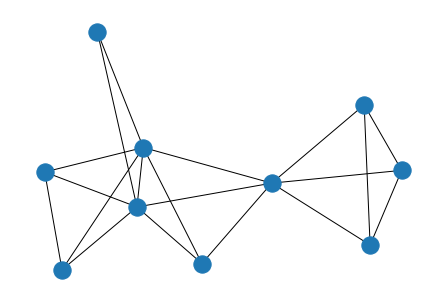

In [ ]:
G = nx.random_geometric_graph(10, 0.555)
pos = nx.spring_layout(G)
nx.draw(G, pos)

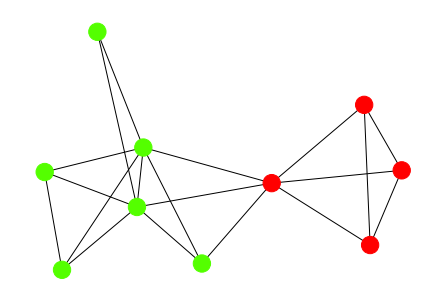

In [ ]:
L = nx.laplacian_matrix(G).toarray()
vals, vecs = np.linalg.eigh(L)
part = [1 if x >= 0 else -1 for x in vecs[:, 1]]

nx.draw(G, pos, node_color=part, cmap=plt.cm.prism)